---

# Gradient Descent


## Definition:

Gradient descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function. This method is commonly used in machine learning (ML) and deep learning(DL) to minimise a cost/loss function (e.g. in a linear regression). Due to its importance and ease of implementation, this algorithm is usually taught at the beginning of almost all machine learning courses.

## Learning steps:

The goal of the gradient descent algorithm is to minimize the given function (say cost function). To achieve this goal, it performs two steps iteratively:

- 1. Compute the gradient (slope), the first order derivative of the function at that point

- 2. Make a step (move) in the direction opposite to the gradient, opposite direction of slope increase from the current point by alpha times the gradient at that point

## Datasets:

We assume that $w_0 = 4$, function $f(w) = (w - 2)^2 + 1$.

## Reference:

https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21

https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/

---

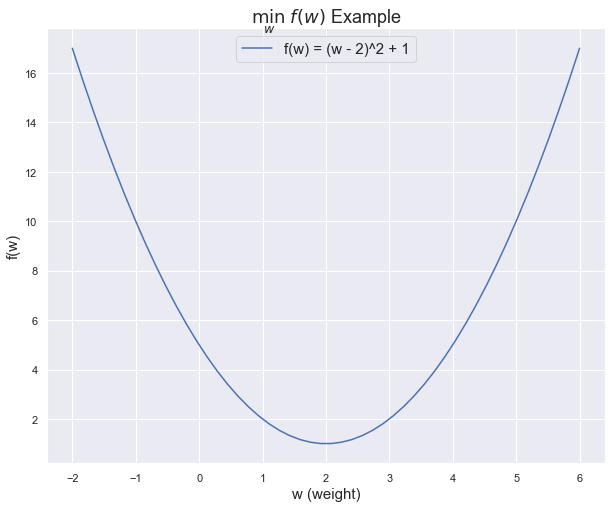

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define test function for experimenting
def f(w):
    return (w - 2)**2  + 1

# Define domain variables for plotting f
domain = np.linspace(-2, 6, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

---

## The Problem Description

Clearly the function $f(w) = (w - 2)^2 + 1$ has a **global minimum** at $w = 2$. Supposing we did not already know the answer, how could we find it? That is, we wish to solve:

$$
\min_{w\in \mathbb{R}} f(w) \:\:\:\:\:\:\:\:\:\: (\text{PROBLEM 1})
$$

This class of problems falls into the reahlm of *unconstrained continuous optimization*. For those of you that are more mathematically inclined, see the excellent and classic text of [Nocedal and Wright](http://egrcc.github.io/docs/math/numerical-optimization.pdf) for an in-depth treatment of the subject.

The treatment of PROBLEM 1 given by Nocedal and Wright is extensive and goes much further than what is currently implemented in machine learning; with some notable exceptions appearing in the literature. Noting these techniques, this notebook focuses on the notion of using the *gradient* (the generalization of the single variable function derivative) in order to "search" for plausable minimum of a function. 

### Start with a Guess
Suppose we first guess that the minimum value of $f(w)$ occurs at $w_0 = 4$. We can visualize the point $(4, f(4))$ by running the following code in the cell below. 

---

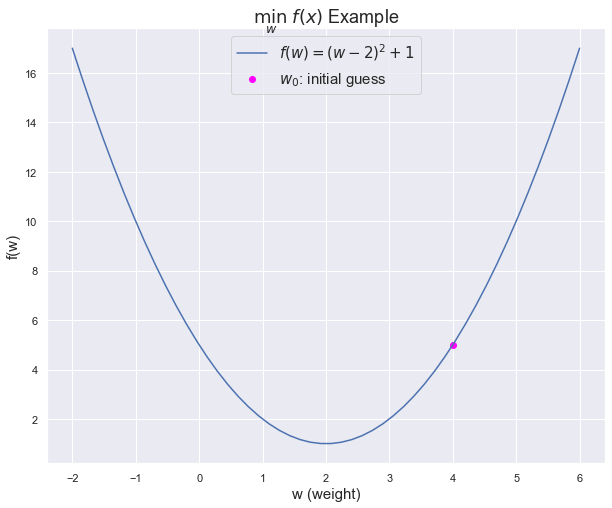

In [4]:
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter([4], [f(4)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

---


### - The General Idea 
The general idea behind gradient descent is to use the gradient (the derivative for single variable functions) to *provide a direction to explore* (this means gradient descent is a **first-order method**). For example, with our function $f$ and initial guess $w_0 = 4$, suppose we are able to calculate the value of the *gradient* (the derivative) of $f(w)$ at $w_0 = 4$. This numerical value will give us the *slope of the tangent line* to $f(w)$ at $w_0$. Note that $f'(w) = 2(w - 2)$.

---

/var/folders/sh/4v6rcsdj4ljdkpq_vkb0jtdh0000gn/T/ipykernel_9746/1587172134.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


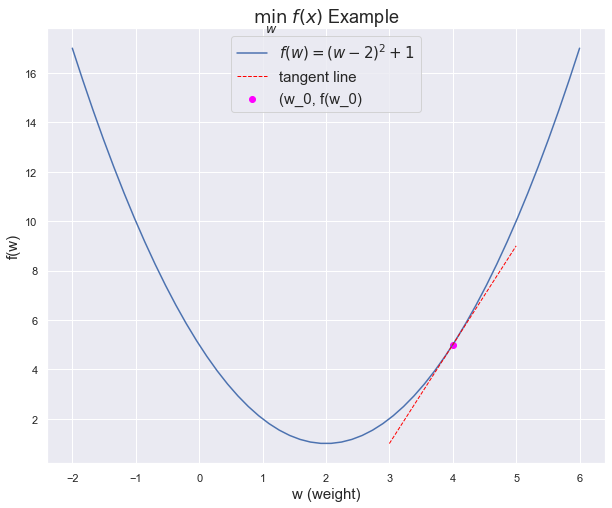

In [5]:
# Define parabola derivative
def df(w): 
    return 2*(w - 2)

# Choose w_0
w_0 = 4.0

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i})")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

---

## Direction of Descent and the Learning Rate

Observing the figure generated by the code above, notice that the tangent line implies a direction of descent. That is, at the point $(4, f(4))$, the tangent line has a positive slope. This indicates that we need move in the negative direction (to the left of $w_0 = 4$) if we wish to move to a smaller value of $f(w)$. That is, **we need to move in the direction opposite of the sign of the derivative of $f(w)$ at $w_0 = 4$**.

### - But how far should we move? 
The value of how far to move in the opposite sign of the derivative of $f(w)$ at $w_0 = 4$ is called the **learning rate** (Nocedal & Wright call this *hyperparameter* the **step length**), and is typically denoted by $\alpha$. The process of multiplying the derivative of $f(w)$ at $w_0 = 4$ by the learning rate and forming a new choice of $w$ by subtracting this quantity from $w_0$ is called **gradient descent**. For example, we may apply gradient descent at $w_0$ and form a new $w$, say $w_1$, with the following update:

$$
w_{n+1} = w_n - \alpha f'(w_n) \:\:\:\:\:\:\:\:\:\: (\text{Gradient Descent Update Rule for a Function of one Variable})
$$

The choice of $\alpha$ in machine learning is typically found by experimentation, though more sophesticated techniques are available, such as *line-search* and *trust-region* methods (again see Nocedal & Wright). 

We can implement one iteration of the gradient descent algorithm by choosing $\alpha = 0.8$ and then running the following code in the cell below. 

---

w_0 = 4.0
w_1 = 0.7999999999999998


/var/folders/sh/4v6rcsdj4ljdkpq_vkb0jtdh0000gn/T/ipykernel_9746/1587172134.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


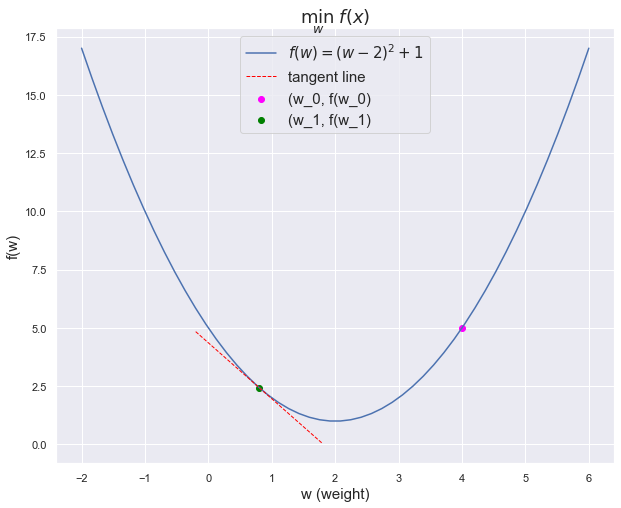

In [6]:
# Initialize choice of w
w_0 = 4.0

# Set learning rate 
alpha = 0.8

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*df(w_0)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()


---

Notice that the new guess $w_1$ gives a new pair $(w_1, f(w_1))$ which is a better choice of a both a *extrema* and minimum value for $f$ than the initial guess $w_0$ would have given. **We are moving downhill on the function $f$.** Let us move again and see where we end up by running the following code in the cell below. 

---

w_0 = 4.0
w_1 = 0.7999999999999998
w_2 = 2.72


/var/folders/sh/4v6rcsdj4ljdkpq_vkb0jtdh0000gn/T/ipykernel_9746/1587172134.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


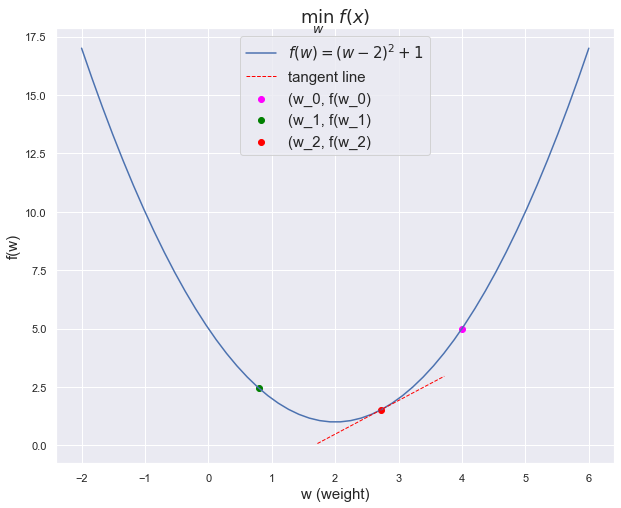

In [7]:
# Moving in the opposite direction of the derivative at w_1
w_2 = w_1 - alpha*df(w_1)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

---

And one more time by running the following code in the cell below.

---

w_0 = 4.0
w_1 = 0.7999999999999998
w_2 = 2.72
w_3 = 1.5679999999999998


/var/folders/sh/4v6rcsdj4ljdkpq_vkb0jtdh0000gn/T/ipykernel_9746/1587172134.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


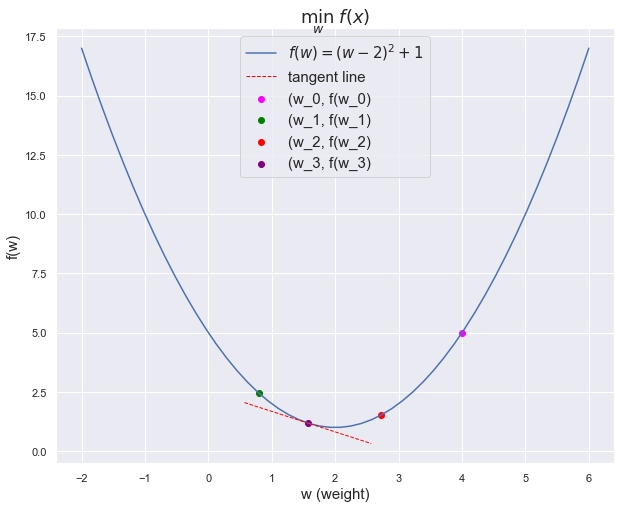

In [8]:
# Moving in the opposite direction of the derivative at w_2
w_3 = w_2 - alpha*df(w_2)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")
print(f"{w_3 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red", show = False)
tangent_line(w_3, f, df, i = 3, color = "purple")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

---

We can easily iterate this process of updating $w_i$ by writing a function called ```derivative_descent```. Try running the following code in the cell below. 

---

w_0 = 4.0 | df(w_0) = 4.0
w_1 = 0.8 | df(w_1) = -2.4000000000000004
w_2 = 2.72 | df(w_2) = 1.4400000000000004
w_3 = 1.57 | df(w_3) = -0.8640000000000003
w_4 = 2.26 | df(w_4) = 0.5183999999999997
w_5 = 1.84 | df(w_5) = -0.31103999999999976
w_6 = 2.09 | df(w_6) = 0.18662400000000012
w_7 = 1.94 | df(w_7) = -0.11197440000000025
w_8 = 2.03 | df(w_8) = 0.0671846399999998
w_9 = 1.98 | df(w_9) = -0.04031078399999988
w_10 = 2.01 | df(w_10) = 0.024186470400000104
w_11 = 1.99 | df(w_11) = -0.014511882239999885
w_12 = 2.0 | df(w_12) = 0.008707129343999753
w_13 = 2.0 | df(w_13) = -0.005224277606399763
w_14 = 2.0 | df(w_14) = 0.0031345665638395914
w_15 = 2.0 | df(w_15) = -0.0018807399383038437
w_16 = 2.0 | df(w_16) = 0.001128443962982395
w_17 = 2.0 | df(w_17) = -0.0006770663777895258



/var/folders/sh/4v6rcsdj4ljdkpq_vkb0jtdh0000gn/T/ipykernel_9746/1587172134.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


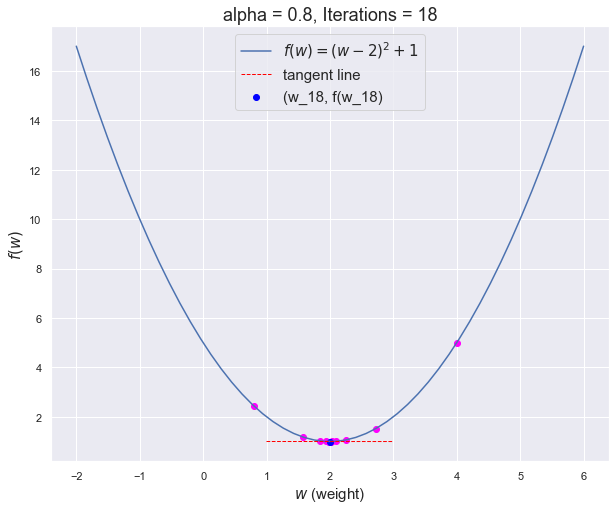

In [9]:
def derivative_descent(derivative, alpha = 0.8, w_0 = 4.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()


---
### - Testing different choices of the Learning Rate $\alpha$
We can test how well our choice of the learning rate $\alpha$ was by comparing it to different choices of $\alpha$. Try running the following code in the cell below. What do you observe?

---

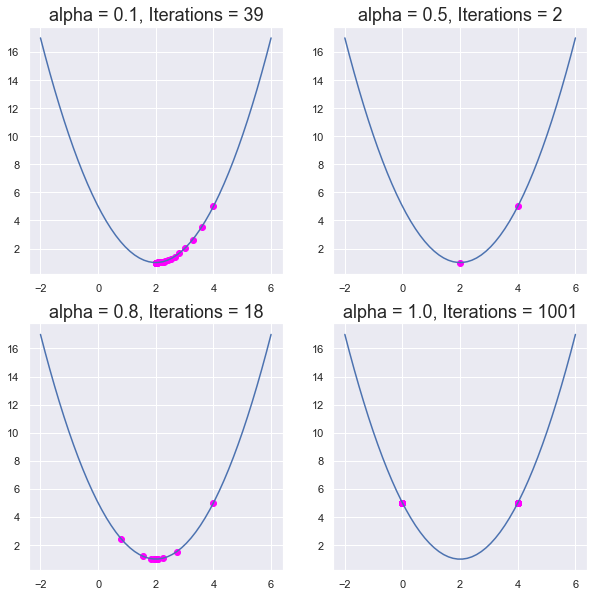

In [10]:
# Possible choices of learning rate 
alphas = [0.1, 0.5, 0.8, 1.0]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)


---

## Minimizing Functions of Several Variables

All of the ideas above naturally generalize to functions of several variables when substituting the gradient for the single variable derivative. Before discussing this notion, we emphasize the general uncrontrained optimization problem:

$$
\min_{w\in \mathbb{R^n}} f(w) \:\:\:\:\:\:\:\:\:\: (\text{PROBLEM 2})
$$

For instructional purposes we next give a specific solution to this problem by focusing on a function of two variables, though all notions covered extend to functions of an arbitrary and finite number of variables. In a general manor, gradient descent can now be defined in a meaningful sense:

$$
w \leftarrow w - \alpha \nabla f(w) \:\:\:\:\:\:\:\:\:\: (\text{True Gradient Descent})
$$




With this multivariable gradient descent defined we now consider the multivariable function $f(w_0, w_1) = w_0^2 + w_1^2 + 1$ which has an obvious minimum at the vector $\mathbf{w} = [0.0, 0.0]^T$. To visualize this function run the following code in the cell below.

---

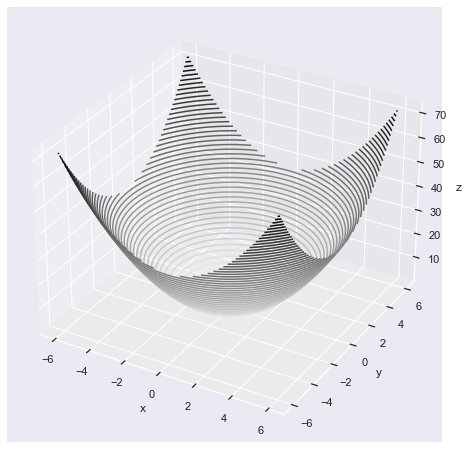

In [12]:
from mpl_toolkits import mplot3d

def f(w_0, w_1):
    return w_0 ** 2 + w_1 ** 2 + 1

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

---

The figure shown by the previous code cell can be a bit hard to visualize. We can work around this problem try running the following code in the cell below. 


---

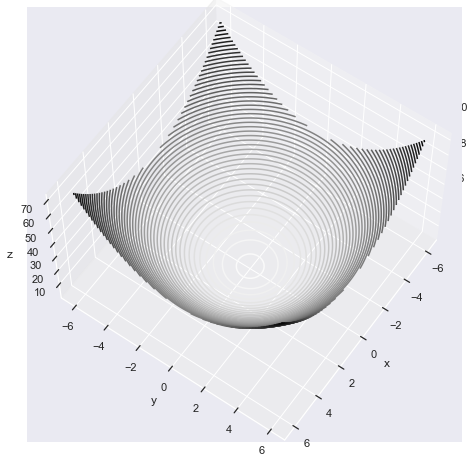

In [13]:
x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.view_init(60, 35)
plt.show()

---

### - True Gradient Descent 
Now that we have a good visualization of our multivariable function we next define the derivative of our function and also update our gradient descent function to work with such functions. Next run the following code in the cell below.


---

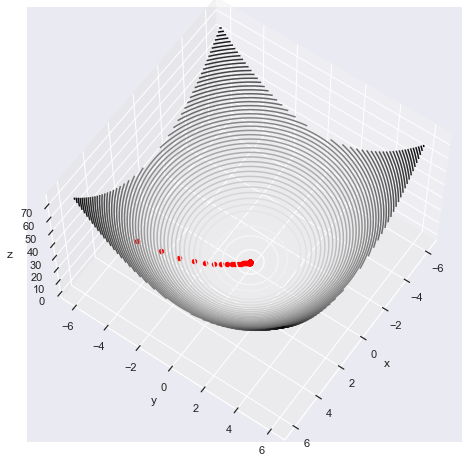

In [14]:
def df(w):
    grad = [2*w[0], 2*w[1]]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.8, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([4.0, -4.0]), alpha = 0.1, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "red")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()

---

## Conclusion

As we have demonstrated in this notebook, gradient descent is a simple way to optimize convex functions. In the next notebook we show how this iterative method can be used to train single neuron models! 




---